## classes are instances of metaclass type

### https://stackoverflow.com/questions/100003/what-are-metaclasses-in-python

### https://eli.thegreenplace.net/2011/08/14/python-metaclasses-by-example/

A metaclass is the class of a class. A class defines how an instance of the class (i.e. an object) behaves while a metaclass defines how a class behaves. A class is an instance of a metaclass.

### https://realpython.com/python-metaclasses/

### 

### 

### 

In most languages, classes are just pieces of code that describe how to produce an object.

In [11]:
import sys
sys.getsizeof(str)

400

In [12]:
import sys
sys.getsizeof(int)

400

In [13]:
len(int)

TypeError: object of type 'type' has no len()

- How classes are created
- How they are instantiated

https://www.youtube.com/watch?v=NAQEj-c2CI8&list=PLzMcBGfZo4-kwmIcMDdXSuy_wSqtU-xDP&index=3&pbjreload=101&ab_channel=TechWithTim

- When should I use metaclasses?

In [ ]:
def hello():
    class HiClass:
        pass
    return HiCLass

- How is a class an object?? I thought class created object for us!
- Class is an object that can create other objects

- Class defines the rules for an object (attributes methods etc)
- Metaclass defined the rules for a class (metaclasses create classes)

In [1]:
class Test:
    pass

type(Test)

type

## Make a class using 'type'

You can also call type() with three arguments—type(`<name>`, `<bases>`, `<dct>`):

- `<name>` specifies the class name. This becomes the `__name__` attribute of the class.
- `<bases>` specifies a tuple of the base classes from which the class inherits. This becomes the `__bases__` attribute of the class.
- `<dct>` specifies a namespace dictionary containing definitions for the class body. This becomes the `__dict__` attribute of the class.

Calling type() in this manner creates a new instance of the type metaclass. In other words, it dynamically creates a new class.

In [ ]:
Test = type('Test', (), {})

'''
type(name i.e. internal representation of the class, 
     basis i.e. anything that we inherit from (superclass),
     attributes)
     
'''

In [3]:
#is completely equivalent to 
class Test:
    pass

In [4]:
# SuperClass
class Foo:
    def show(self):
        print('hi')

In [8]:
# method to be added
def add_attribute(self):
    self.z = 9

In [9]:
Test = type('Test', (Foo,), {'x':5, 'add_attribute': add_attribute})
# 'x' is an attribute and 'add_attribute' is a method
t = Test()
print(t.x)
t.show()

5
hi


In [10]:
t.add_attribute()
print(t.z)

9


In [ ]:
class Dog: # --> this gets pass into the metaclass that return an 
    #object representing the class
    

In [17]:
print(type(object))

<class 'type'>


In [18]:
print(type(int))

<class 'type'>


In [19]:
print(type(float))

<class 'type'>


In [20]:
isinstance(int, object)

True

In [25]:
issubclass(int, object)

True

In [28]:
issubclass(int, int)

True

In [23]:
isinstance(int, int)

False

In [22]:
isinstance(object, object)

True

In [24]:
isinstance(object, type)

True

In [27]:
isinstance(type, object)

True

In [29]:
issubclass(object , type)

False

In [30]:
issubclass(type , object)

True

In [33]:
issubclass(int , type)

False

In [35]:
int.mro()

[int, object]

### For MRO on metaclasses see 

### https://stackoverflow.com/questions/34358767/why-does-mro-on-a-metaclass-have-a-different-signature-descriptor-mro-of

and also 

https://stackoverflow.com/questions/37227957/method-resolution-order-and-metaclasses

In [36]:
type.mro()  

TypeError: descriptor 'mro' of 'type' object needs an argument

In [37]:
type.mro(type) 

[type, object]

In [31]:
class A():
    pass
class B(A):
    pass
class C(B):
    pass

issubclass(C,A)

True

In [32]:
isinstance(C, A)

False

# Every class (except object) inherits from object.

- self.\__bases__ is used to get the superclass of a class

In [39]:
for x in object, int, float, str, list, dict:
     print(f'{x.__name__:6}: {x.__bases__}')

object: ()
int   : (<class 'object'>,)
float : (<class 'object'>,)
str   : (<class 'object'>,)
list  : (<class 'object'>,)
dict  : (<class 'object'>,)


# Every class is an instance of the class type

- self.\__class__ is a reference to the **type** of the current instance

In [44]:
class A():
    pass

a= A()
a.__class__  #a is an instance of class A

__main__.A

## Type is a class constructor
## Every class is an instance of type class
## Hence every class was created from type

In [49]:
A.__class__ #class A is an instance of class type

type

In [45]:
int.__class__  #class int is an instance of class type

type

In [47]:
object.__class__ #object is an instance of class type

type

## Type is an instance of itself

In [48]:
type.__class__ #type is an instance of class type

type

In [50]:
isinstance(type, type)

True

## Object is an instance of itself

In [51]:
isinstance(object, object)

True

### Usefull links to understand metaclasses

- https://stackoverflow.com/questions/55775218/why-is-object-an-instance-of-type-and-type-an-instance-of-object
- https://stackoverflow.com/questions/30565083/python-metaclass-type-class-and-the-object-class
- Confusion between function and classes and callables: https://treyhunner.com/2019/04/is-it-a-class-or-a-function-its-a-callable/

- 

In [61]:
print(int)

<class 'int'>


In [62]:
print(zip)

<class 'zip'>


In [66]:
print(len)

<built-in function len>


In [71]:
import inspect

In [74]:
inspect.getsource(enumerate)

TypeError: <class 'enumerate'> is a built-in class

# type(object) is the same as object.\__class__

In [ ]:
## type() method indicates the class that an object belongs to

In [58]:
print(type(int())) # an instance object int() (i.e. 0) is produced by the int class (<class> 'int')

<class 'int'>


In [59]:
print(type(zip()))

<class 'zip'>


In [65]:
print(type(len))

<class 'builtin_function_or_method'>


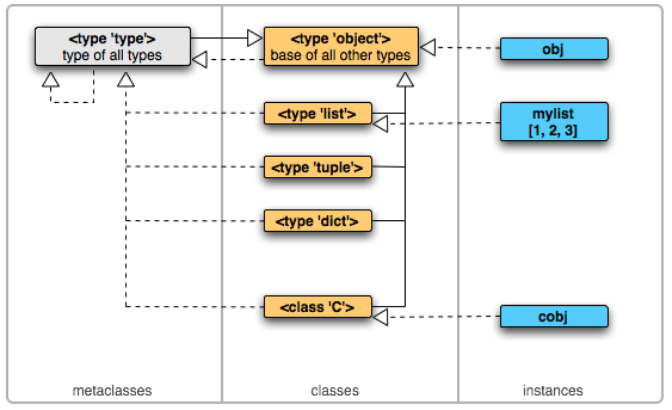

In [ ]:
## type(name, bases, attributes)

In [78]:
class Meta(type):
    
    def __new__(self, class_name, bases, attrs):
        '''
        In __new__ method happens the construction of a new class from Metaclass
        '''
        print(attrs)
        return type(class_name, bases, attrs)
    
class Dog(metaclass=Meta):
    x=5
    y=8
    
    def hello(self):
        print('hi')

{'__module__': '__main__', '__qualname__': 'Dog', 'x': 5, 'y': 8, 'hello': <function Dog.hello at 0x00000213DB96CC18>}


In [77]:
d = Dog()  

### Let's change all attributes to be uppercase as an example

In [79]:
class Meta(type):
    
    def __new__(self, class_name, bases, attrs):  
        '''
        In __new__ method happens the construction of a new class from Metaclass
        
        - bases: tuple of superclasses
        - attrs: dictionary of attributes and functions
        
        '''
        print(attrs)
        
        a = {}
        for name, value in attrs.items():
            if name.startswith('__'):
                a[name] = value # do not modify it if it starts with __
            else:
                a[name.upper()] = value
                
        print(a)
        
        return type(class_name, bases, a)
    
class Dog(metaclass=Meta):
    x=5
    y=8
    
    def hello(self):
        print('hi')

{'__module__': '__main__', '__qualname__': 'Dog', 'x': 5, 'y': 8, 'hello': <function Dog.hello at 0x00000213DB96CA68>}
{'__module__': '__main__', '__qualname__': 'Dog', 'X': 5, 'Y': 8, 'HELLO': <function Dog.hello at 0x00000213DB96CA68>}


In [80]:
d = Dog() 
d.x

AttributeError: 'Dog' object has no attribute 'x'

In [81]:
d.X

5

## You could create metaclasses for a module, in order to force a behavior in their attributes for example